In [ ]:
from google.colab import files

# This will prompt you to select a file to upload
uploaded = files.upload()

# After upload, save kaggle.json to the proper location
import shutil
import os

if 'kaggle.json' in uploaded:
    os.makedirs('/root/.kaggle', exist_ok=True)
    shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
    os.chmod('/root/.kaggle/kaggle.json', 0o600)
    print("kaggle.json uploaded and permissions set!")
else:
    print("Please upload kaggle.json file.")

Saving kaggle.json to kaggle.json
kaggle.json uploaded and permissions set!


In [ ]:
# Download the dataset
!kaggle datasets download -d openfoodfacts/world-food-facts --unzip -p ./data

Dataset URL: https://www.kaggle.com/datasets/openfoodfacts/world-food-facts
License(s): DbCL-1.0
 74% 80.0M/109M [00:00<00:00, 836MB/s]
100% 109M/109M [00:00<00:00, 777MB/s] 


In [ ]:
import pandas as pd

# Load the TSV file
df = pd.read_csv('data/en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)






In [ ]:
# Load the already converted CSV
df = pd.read_csv('data/en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)

# Show number of rows and columns
print(f"\n Shape: {df.shape}")
df.head()


 Shape: (356027, 163)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Keep only relevant columns
df = df[['product_name', 'ingredients_text','categories','carbon-footprint_100g', 'countries_en']]

# Drop rows where product_name is missing
df = df.dropna(subset=['product_name'])

# Save the cleaned file (optional)
df.to_csv('openfoodfacts_cleaned.csv', index=False)

print("Cleaned dataset saved as 'openfoodfacts_cleaned.csv'")


Cleaned dataset saved as 'openfoodfacts_cleaned.csv'


In [ ]:
df = pd.read_csv('openfoodfacts_cleaned.csv', low_memory=False)

# Show number of rows and columns
print(f"\n Shape: {df.shape}")
df.head(30)





 Shape: (338515, 5)


,product_name,ingredients_text,categories,carbon-footprint_100g,countries_en
0,Farine de blé noir,NaN,NaN,NaN,France
1,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,United States
2,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,United States
3,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,United States
4,Organic Polenta,Organic polenta,NaN,NaN,United States
5,Breadshop Honey Gone Nuts Granola,"Rolled oats, grape concentrate, expeller press...",NaN,NaN,United States
6,Organic Long Grain White Rice,Organic long grain white rice,NaN,NaN,United States
7,Organic Muesli,"Org oats, org hemp granola (org oats, evaporat...",NaN,NaN,United States
8,Organic Dark Chocolate Minis,"Organic chocolate liquor, organic raw cane sug...",NaN,NaN,United States
9,Organic Sunflower Oil,"Organic expeller pressed, refined high oleic s...",NaN,NaN,United States


In [ ]:

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
product_name                  0
ingredients_text          56418
categories               236354
carbon-footprint_100g    338238
countries_en                219
dtype: int64


In [ ]:
import pandas as pd

# Keep only relevant columns
df = df[['product_name', 'ingredients_text', 'countries_en']]

# Drop rows where product_name is missing
df = df.dropna(subset=['product_name'])

# Save the cleaned file (optional)
df.to_csv('openfoodfacts_products.csv', index=False)

print("Cleaned dataset saved as 'openfoodfacts_products.csv'")

Cleaned dataset saved as 'openfoodfacts_products.csv'


In [ ]:


# Show number of rows and columns
print(f"\n Shape: {df.shape}")
df.head(20)



 Shape: (338515, 3)


,product_name,ingredients_text,countries_en
0,Farine de blé noir,NaN,France
1,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",United States
2,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",United States
3,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",United States
4,Organic Polenta,Organic polenta,United States
5,Breadshop Honey Gone Nuts Granola,"Rolled oats, grape concentrate, expeller press...",United States
6,Organic Long Grain White Rice,Organic long grain white rice,United States
7,Organic Muesli,"Org oats, org hemp granola (org oats, evaporat...",United States
8,Organic Dark Chocolate Minis,"Organic chocolate liquor, organic raw cane sug...",United States
9,Organic Sunflower Oil,"Organic expeller pressed, refined high oleic s...",United States


In [ ]:
!pip install langdetect
import pandas as pd
from langdetect import detect
from tqdm import tqdm




In [ ]:
import pandas as pd

df = pd.read_csv('/content/english_products_only.csv', low_memory=False)


# Show number of rows and columns
print(f"\n Shape: {df.shape}")
df.head(20)



 Shape: (133995, 4)


,product_name,ingredients_text,countries_en,is_english
0,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",United States,True
1,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",United States,True
2,Breadshop Honey Gone Nuts Granola,"Rolled oats, grape concentrate, expeller press...",United States,True
3,Organic Long Grain White Rice,Organic long grain white rice,United States,True
4,Organic Dark Chocolate Minis,"Organic chocolate liquor, organic raw cane sug...",United States,True
5,Organic Sunflower Oil,"Organic expeller pressed, refined high oleic s...",United States,True
6,Organic Penne Pasta,Organic refined durum semolina wheat flour,United States,True
7,Zen Party Mix,"Roasted peanuts (peanuts, peanut or canola oil...",United States,True
8,Cinnamon Nut Granola,"Organic rolled oats, honey, raisins, almonds, ...",United States,True
9,Organic Sweetened Banana Chips,"Organic bananas, organic coconut oil, organic ...",United States,True


In [6]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [7]:
%cd "/content/drive/MyDrive/Colab Notebooks/LLM Project"

/content/drive/MyDrive/Colab Notebooks/LLM Project


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Cleaned_Sectors.csv")

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print(df.columns.tolist())

['CPC_description']


In [ ]:
food_keywords = [
    "cultivation", "agriculture", "wheat", "rice", "maize", "vegetables", "fruit", "nuts",
    "oil seeds", "sugar", "animal", "meat", "fish", "dairy", "milk", "poultry",
    "eggs", "butchery", "food", "farming", "cereal", "oats", "beverages", "bread",
    "bakery", "processed", "slaughtering", "livestock"
]
# Filter food-related CPC entries
df = pd.read_csv("/content/drive/My Drive/Cleaned_Sectors.csv")#file from sectors in MRIO data
food_cpc_df = df[
    df['CPC_description'].str.lower().apply(
        lambda desc: any(keyword in desc for keyword in food_keywords)
    )
].reset_index(drop=True)

candidate_labels = food_cpc_df['CPC_description'].dropna().tolist()

food_cpc_df.to_csv("food_CPC_descriptions.csv", index=False)


In [ ]:
import pandas as pd

#cleanning
df = pd.read_csv("food_CPC_descriptions.csv")

#
df['CPC_description'] = (
    df['CPC_description']
    .astype(str)
    .str.replace(r"[\{\}']", "", regex=True)
    .str.strip()  )


print(df.head(10))


df.to_csv("Cleaned_food_CPC.csv", index=False)

                          CPC_description
0               Cultivation of paddy rice
1                    Cultivation of wheat
2        Cultivation of cereal grains nec
3  Cultivation of vegetables, fruit, nuts
4                Cultivation of oil seeds
5   Cultivation of sugar cane, sugar beet
6       Cultivation of plant-based fibers
7                Cultivation of crops nec
8                          Cattle farming
9                            Pigs farming


In [ ]:
!pip install -U sentence-transformers --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 537.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00


In [8]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
import gc

# Load CPC descriptions
cpc_df = pd.read_csv("Cleaned_food_CPC.csv")  # Column: 'CPC_description'
cpc_df.columns = cpc_df.columns.str.strip()
candidate_labels = cpc_df['CPC_description'].dropna().tolist()

# Load product data (translated product names)
products_df = pd.read_csv("english_products_only.csv")
products_df = products_df.dropna(subset=["product_name"]).head(500)


# Initialize the zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

# Enable tqdm for progress
tqdm.pandas()

# Function to classify a product name
def classify_product(text):
    try:
        result = classifier(text, candidate_labels, multi_label=False)
        return result['labels'][0]  # Top predicted CPC description
    except Exception as e:
        return None

gc.collect()

# Apply classification to all product names
products_df = products_df.dropna(subset=["product_name"])
products_df["MRIO_CPC_description"] = products_df["product_name"].progress_apply(classify_product)

# Save result
products_df.to_csv("products_MRIO_description.csv", index=False)
print("Done! Saved to 'products_MRIO_description.csv'")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
100%|██████████| 500/500 [04:20<00:00,  1.92it/s]

Done! Saved to 'products_MRIO_description.csv'


In [ ]:
import pandas as pd

df = pd.read_csv("products_MRIO_description (3).csv")
df.head(10)


,product_name,ingredients_text,countries_en,is_english,MRIO_CPC_description
0,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",United States,True,Processing of Food products nec
1,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",United States,True,Processing of Food products nec
2,Breadshop Honey Gone Nuts Granola,"Rolled oats, grape concentrate, expeller press...",United States,True,Cultivation of cereal grains nec
3,Organic Long Grain White Rice,Organic long grain white rice,United States,True,Cultivation of cereal grains nec
4,Organic Dark Chocolate Minis,"Organic chocolate liquor, organic raw cane sug...",United States,True,Manufacture of beverages
5,Organic Sunflower Oil,"Organic expeller pressed, refined high oleic s...",United States,True,Cultivation of oil seeds
6,Organic Penne Pasta,Organic refined durum semolina wheat flour,United States,True,Processing of Food products nec
7,Cinnamon Nut Granola,"Organic rolled oats, honey, raisins, almonds, ...",United States,True,Cultivation of cereal grains nec
8,Organic Sweetened Banana Chips,"Organic bananas, organic coconut oil, organic ...",United States,True,Processing of Food products nec
9,Lotus Organic Brown Jasmine Rice,Organic brown jasmine rice,United States,True,Cultivation of cereal grains nec


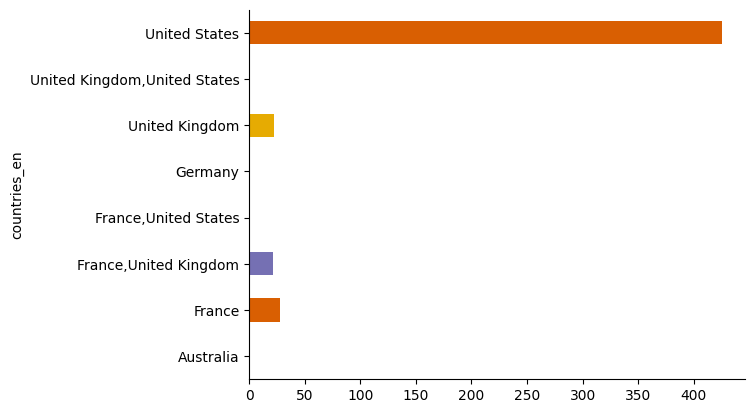

In [ ]:
# @title countries_en

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('countries_en').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'openfoodfacts_products.csv', 'products_MRIO_description.tsv', 'products_MRIO_description (3).csv', 'drive', 'openfoodfacts_cleaned.csv', 'Cleaned_food_CPC.csv', 'CPC_codes_cleaned.csv', 'data', 'food_CPC_descriptions.csv', 'english_products_only.csv', 'sample_data']


In [ ]:
import os
csv_dir = 'fdc_data/FoodData_Central_csv_2025-04-24'
print([f for f in os.listdir(csv_dir) if f.endswith('.csv')])


['retention_factor.csv', 'food_protein_conversion_factor.csv', 'lab_method.csv', 'food_portion.csv', 'survey_fndds_food.csv', 'food_nutrient_source.csv', 'sample_food.csv', 'food_attribute.csv', 'market_acquisition.csv', 'nutrient.csv', 'food.csv', 'input_food.csv', 'fndds_derivation.csv', 'lab_method_code.csv', 'food_component.csv', 'sub_sample_result.csv', 'acquisition_samples.csv', 'sr_legacy_food.csv', 'branded_food.csv', 'food_nutrient.csv', 'food_calorie_conversion_factor.csv', 'microbe.csv', 'wweia_food_category.csv', 'food_update_log_entry.csv', 'food_category.csv', 'lab_method_nutrient.csv', 'food_nutrient_derivation.csv', 'measure_unit.csv', 'food_nutrient_conversion_factor.csv', 'sub_sample_food.csv', 'fndds_ingredient_nutrient_value.csv', 'food_attribute_type.csv', 'foundation_food.csv', 'agricultural_samples.csv']


In [ ]:
import pandas as pd

foods = pd.read_csv(f'{csv_dir}/food.csv', low_memory=False)
categories = pd.read_csv(f'{csv_dir}/food_category.csv', low_memory=False)

print("foods:", foods.shape)
print(foods.columns)
print("categories:", categories.shape)
print(categories.columns)
foods.head(10)
categories.head(10)


foods: (2064912, 5)
Index(['fdc_id', 'data_type', 'description', 'food_category_id',
       'publication_date'],
      dtype='object')
categories: (28, 3)
Index(['id', 'code', 'description'], dtype='object')


,id,code,description
0,1,100,Dairy and Egg Products
1,2,200,Spices and Herbs
2,3,300,Baby Foods
3,4,400,Fats and Oils
4,5,500,Poultry Products
5,6,600,"Soups, Sauces, and Gravies"
6,7,700,Sausages and Luncheon Meats
7,8,800,Breakfast Cereals
8,9,900,Fruits and Fruit Juices
9,10,1000,Pork Products


In [ ]:
import pandas as pd

products_df = pd.read_csv('/content/drive/My Drive/products_MRIO_description (3).csv')
# or, if local:
# products_df = pd.read_csv('/content/products_MRIO_description (3).csv')

products_df = products_df.dropna(subset=['product_name'])
products_df['product_name'] = products_df['product_name'].astype(str)


In [ ]:
import pandas as pd

# Load your Open Food Facts + CPC products
products_df = pd.read_csv('/content/drive/My Drive/products_MRIO_description (3).csv')
products_df = products_df.dropna(subset=['product_name'])
products_df['product_name'] = products_df['product_name'].astype(str)

# Load Clark/OWID LCA data
lca_df = pd.read_csv('/content/Environmental impacts of food (Clark et al. 2022) (2).csv')
clark_entities = lca_df['Entity'].dropna().unique().tolist()


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm

model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings for LCA entities
entity_emb = model.encode(clark_entities, convert_to_numpy=True, show_progress_bar=True)

# Get unique product names or, for better results, use a "category" column if you have one.
product_texts = products_df['product_name'].tolist()
product_emb = model.encode(product_texts, convert_to_numpy=True, show_progress_bar=True)

# Find best LCA match for each product
def find_best_lca(prod_emb):
    sim = np.dot(entity_emb, prod_emb) / (np.linalg.norm(entity_emb, axis=1) * np.linalg.norm(prod_emb) + 1e-8)
    idx = np.argmax(sim)
    return clark_entities[idx], sim[idx]

matches = [find_best_lca(emb) for emb in tqdm(product_emb, desc="Mapping products")]
products_df['lca_food_group'] = [m[0] for m in matches]
products_df['lca_similarity'] = [m[1] for m in matches]


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Mapping products: 100%|██████████| 500/500 [00:00<00:00, 7050.39it/s]


In [ ]:
lca_df_simple = lca_df[['Entity', 'ghg_kg', 'land_use_kg']].drop_duplicates(subset=['Entity']).set_index('Entity')
products_df = products_df.join(lca_df_simple, on='lca_food_group')

products_df.rename(columns={
    'ghg_kg': 'co2_kg_per_kg',
    'land_use_kg': 'land_use_m2_per_kg',
}, inplace=True)

print(products_df[['product_name', 'lca_food_group', 'lca_similarity', 'co2_kg_per_kg', 'land_use_m2_per_kg']].head(10))


                        product_name  lca_food_group  lca_similarity  \
0     Banana Chips Sweetened (Whole)         Bananas        0.617625   
1             Organic Salted Nut Mix     Cashew nuts        0.553634   
2  Breadshop Honey Gone Nuts Granola         Granola        0.616871   
3      Organic Long Grain White Rice            Rice        0.681423   
4       Organic Dark Chocolate Minis  Dark chocolate        0.680555   
5              Organic Sunflower Oil   Sunflower oil        0.911246   
6                Organic Penne Pasta     Penne pasta        0.888966   
7               Cinnamon Nut Granola         Granola        0.773072   
8     Organic Sweetened Banana Chips         Bananas        0.616893   
9   Lotus Organic Brown Jasmine Rice            Rice        0.618124   

   co2_kg_per_kg  land_use_m2_per_kg  
0       0.873350            2.639824  
1       2.087644           11.720882  
2       1.781193            5.141598  
3       3.925910            2.936661  
4      20.62

In [ ]:
products_df.to_csv('openfoodfacts_products_with_lca.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for the relevant column
print(products_df.columns)  # You should see something like 'MRIO_CPC_description'

# Let's aggregate by MRIO sector
grouped = (
    products_df
    .groupby('MRIO_CPC_description')
    .agg(
        count=('product_name', 'count'),
        avg_co2_kg_per_kg=('co2_kg_per_kg', 'mean'),
        avg_land_use_m2_per_kg=('land_use_m2_per_kg', 'mean')
    )
    .sort_values('count', ascending=False)
)

print(grouped.head(10))


Index(['product_name', 'ingredients_text', 'countries_en', 'is_english',
       'MRIO_CPC_description', 'lca_food_group', 'lca_similarity',
       'co2_kg_per_kg', 'land_use_m2_per_kg'],
      dtype='object')
                                                    count  avg_co2_kg_per_kg  \
MRIO_CPC_description                                                           
Manufacture of beverages                              119           6.012665   
Processing of Food products nec                       108           4.221942   
Cultivation of crops nec                               85           2.566051   
Processing of dairy products                           50           8.036735   
Cultivation of cereal grains nec                       49           2.633540   
Cultivation of plant-based fibers                      22           4.039801   
Cultivation of vegetables, fruit, nuts                  9           1.307253   
"Fishing, operating of fish hatcheries and fish...      8           5.5

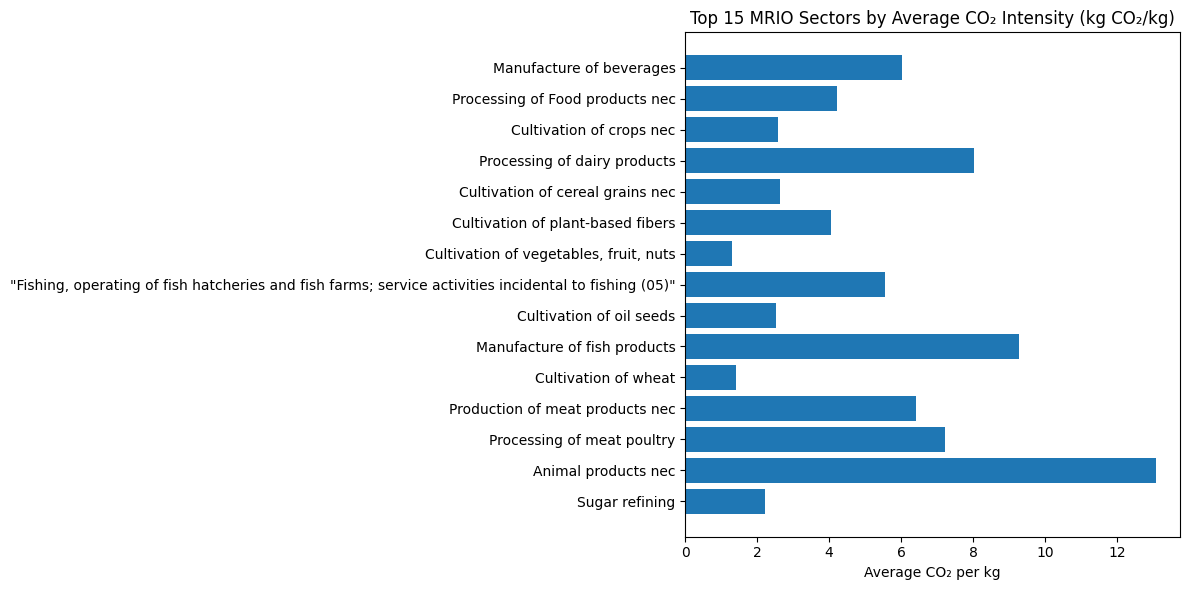

In [ ]:
top_n = 15
top_sectors = grouped.head(top_n)

plt.figure(figsize=(12, 6))
plt.barh(top_sectors.index[::-1], top_sectors['avg_co2_kg_per_kg'][::-1])
plt.xlabel("Average CO₂ per kg")
plt.title(f"Top {top_n} MRIO Sectors by Average CO₂ Intensity (kg CO₂/kg)")
plt.tight_layout()
plt.show()


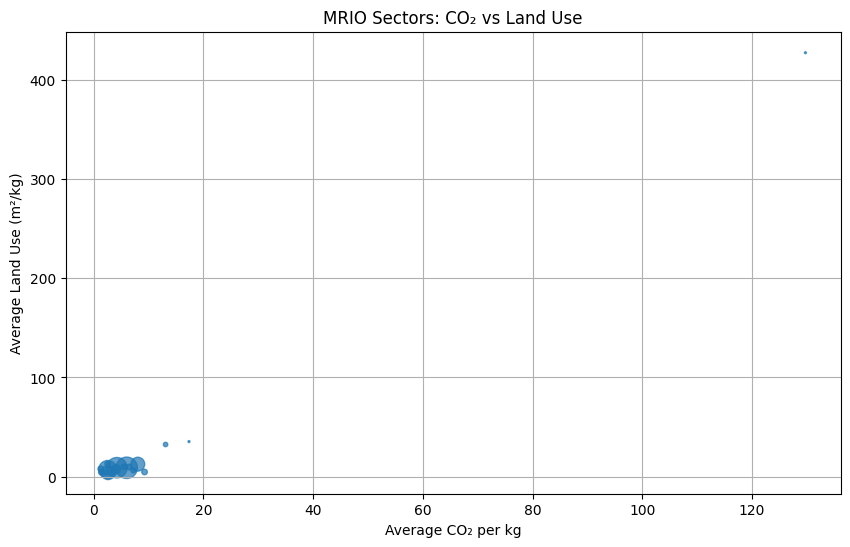

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(grouped['avg_co2_kg_per_kg'], grouped['avg_land_use_m2_per_kg'], s=grouped['count']*2, alpha=0.7)
plt.xlabel("Average CO₂ per kg")
plt.ylabel("Average Land Use (m²/kg)")
plt.title("MRIO Sectors: CO₂ vs Land Use")
plt.grid(True)
plt.show()


In [ ]:
grouped.to_csv('mrio_sector_lca_summary.csv')


In [ ]:
print(products_df.columns.tolist())


['product_name', 'ingredients_text', 'countries_en', 'is_english', 'MRIO_CPC_description', 'lca_food_group', 'lca_similarity', 'co2_kg_per_kg', 'land_use_m2_per_kg']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Adjust path if your .zarr is in a subfolder
zarr_path = '/content/drive/My Drive/2022.zarr'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(products_df.columns)


Index(['MRIO_CPC_description', 'count', 'avg_co2_kg_per_kg',
       'avg_land_use_m2_per_kg', 'MRIO_sector_index'],
      dtype='object')


In [ ]:
!pip install zarr numcodecs --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.9 MB/s eta 0:00:00


In [3]:
!pip install zarr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 127.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 5.3 MB/s eta 0:00:00


In [9]:
import zarr

z = zarr.open('2022.zarr', mode='r')
sector_names = z['input_sector'][:]
sector_names = [s.decode('utf-8') if isinstance(s, bytes) else str(s) for s in sector_names]
sector_desc_to_idx = {desc: idx for idx, desc in enumerate(sector_names)}


In [10]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm

products_df = pd.read_csv('openfoodfacts_products_with_lca.csv')

# Prepare for semantic matching if necessary
product_sectors = products_df['MRIO_CPC_description'].fillna('').astype(str).tolist()
model = SentenceTransformer('all-MiniLM-L6-v2')
prod_emb = model.encode(product_sectors, convert_to_numpy=True, show_progress_bar=True)
exio_emb = model.encode(sector_names, convert_to_numpy=True, show_progress_bar=True)

def best_match(prod_emb_row):
    sim = np.dot(exio_emb, prod_emb_row) / (np.linalg.norm(exio_emb, axis=1) * np.linalg.norm(prod_emb_row) + 1e-8)
    idx = np.argmax(sim)
    return sector_names[idx], idx, sim[idx]

matches = [best_match(emb) for emb in tqdm(prod_emb, desc="Semantic matching")]
products_df['EXIO_sector_exact'] = [m[0] for m in matches]
products_df['EXIO_sector_index'] = [m[1] for m in matches]
products_df['sector_match_similarity'] = [m[2] for m in matches]


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Semantic matching: 100%|██████████| 500/500 [00:00<00:00, 17489.53it/s]


In [11]:
# Take the mean CO2 value for each sector index (in case of multiple matches)
sector_lca = (
    products_df.groupby('EXIO_sector_index')['co2_kg_per_kg']
    .mean()
    .dropna()
    .to_dict()
)
print("Sector index to LCA CO2 (first 5):", list(sector_lca.items())[:5])


Sector index to LCA CO2 (first 5): [(0, 13.101103765935292), (3, 8.036734591470173), (42, 1.396947181119945), (44, 9.272523720759843), (55, 17.36872478560908)]


In [12]:
import zarr

store = zarr.open('2022.zarr', mode='r')
Q = store['Q'][:]  # shape: (19, 189, 163)
sector_names = store['input_sector'][:]  # likely bytes, decode if needed
sector_names = [s.decode() if isinstance(s, bytes) else str(s) for s in sector_names]

# Let's look at the first env indicator (e.g. CO₂) for all regions and a known food sector
sector_idx = 0  # Change to a food sector index if you know it
print(f"Sector name: {sector_names[sector_idx]}")
print(Q[0, :, sector_idx])  # All regions for that sector



Sector name: 0
[0.00000000e+00 0.00000000e+00 6.31695885e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.28611271e+03 0.00000000e+00 1.35028346e+02 2.98405535e+02
 5.13692065e-02 9.68968902e+00 0.00000000e+00 1.28068987e+03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.51730500e+02 4.60407633e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.01102095e+04 1.25155423e+04 3.20153966e+05 0.00000000e+00
 6.11281840e+03 2.01052168e+04 3.24824895e+05 2.08921640e+02
 8.56243091e+02 6.57919677e+02 0.00000000e+00 7.99514851e+02
 7.30284181e+02 0.00000000e+00 1.49362119e+05 4.78587894e+00
 3.36888044e+03 8.45739010e+02 2.06446763e+03 2.55877289e+04
 6.03646961e+02 1.52937355e+01 4.06975690e+03 3.49456533e+03
 6.37522426e+02 0.00000000e+00 6.09122343e+02 0.00000000e+00
 1.01948558e+04 3.13285832e+03 2.15544745e+03 0.00000000e+00
 2.65832527e+04 9.13019831e+00 1.24426657e+03 1.88209319e+04
 7.077621

In [13]:
import os
import zarr
import numpy as np
from tqdm import tqdm
from scipy.linalg import solve
from numcodecs import Blosc
import cupy as cp
import cupy as cp
import numpy as np
xp = cp


class EnvironmentalInputOutputModel:
    def __init__(self, data_path):
        self.store = zarr.open(data_path, mode='r')
        self._extract_data()

    def _extract_data(self):
        # Original shapes from zarr store
        self.transactions = self.store["T"][:]   # (189,163,189,163)
        self.final_demand = self.store["Y"][:]  # (189,163,189)
        self.environmental_factors = self.store["Q"][:]  # (18,189,163)

        # Dimensions
        self.num_regions = 189
        self.num_sectors = 163
        self.total_units = self.num_regions * self.num_sectors
        self.num_env_indicators = self.environmental_factors.shape[0]

        # Flatten & transfer to GPU arrays
        self.Z_matrix = xp.asarray(self.transactions.reshape(self.total_units, self.total_units))
        self.Y_vector = xp.asarray(self.final_demand.reshape(self.total_units, self.num_regions).sum(axis=1))
        self.Q_matrix = xp.asarray(self.environmental_factors.reshape(self.num_env_indicators, self.total_units))

    def calculate_leontief_inverse(self):
        """
        Calculate the Leontief inverse matrix L = (I - A)^-1
        where A = Z / x with x = Z.sum(axis=1) + y
        """
        x = self.Z_matrix.sum(axis=1) + self.Y_vector
        x = xp.where(x <= 0, xp.inf, x)
        A = self.Z_matrix / x[:, None]
        A = xp.where(xp.isnan(A) | xp.isinf(A), 0, A)
        I = xp.eye(self.total_units)
        B = I - A

        # Move to CPU for scipy.linalg.solve since CuPy's solve may not be available
        B_cpu = cp.asnumpy(B)
        y_cpu = cp.asnumpy(self.Y_vector)
        L = solve(B_cpu, y_cpu)
        return L, x

    def compute_environmental_impact(self, output_path, batch=512):
        """
        Computes the environmental impact matrix D = S * L
        where S = Q / x and L is Leontief inverse times y
        Stores the output as a zarr dataset with compression
        """
        L_y, x = self.calculate_leontief_inverse()

        # Transfer environmental factors and x to CPU for batch operations
        Q_cpu = cp.asnumpy(self.Q_matrix)
        x_cpu = cp.asnumpy(x)

        # Normalize environmental factors
        S = Q_cpu / x_cpu[None, :]
        S = np.nan_to_num(S, nan=0, posinf=0, neginf=0)

        # Prepare zarr output store
        zarr_out = zarr.open(output_path, mode="w", zarr_version=2)
        dataset = zarr_out.create_dataset(
            name="Environmental_Impact_3D",
            shape=(self.num_env_indicators, self.total_units, self.total_units),
            chunks=(1, batch, self.total_units),
            dtype="float32",
            compressor=Blosc(cname="zstd", clevel=5),
            overwrite=True
        )

        # Batch-wise calculation and storage to save memory
        for env_idx in tqdm(range(self.num_env_indicators), desc="Calculating environmental impact", unit="indicator"):
            impact_vector = S[env_idx]
            impact_vector = np.nan_to_num(impact_vector)

            for start_idx in range(0, self.total_units, batch):
                end_idx = min(start_idx + batch, self.total_units)
                block = impact_vector[start_idx:end_idx, None] * L_y[None, :]
                dataset[env_idx, start_idx:end_idx, :] = block.astype(np.float32)

        print(f"✅ Environmental impact matrix saved to: {output_path}")

    def compute_additional_metrics(self):
        """
        Example additional calculation:
        - Calculate sectoral intensities (env impact per unit output)
        - Calculate total environmental footprint per region
        """
        # Total output vector x
        x = self.Z_matrix.sum(axis=1) + self.Y_vector

        # Environmental intensities (Q / total output)
        env_intensity = self.Q_matrix / x[None, :]
        env_intensity = xp.where(xp.isnan(env_intensity) | xp.isinf(env_intensity), 0, env_intensity)

        # Aggregate by region: sum intensities across sectors within each region
        reshaped_intensity = env_intensity.reshape(self.num_env_indicators, self.num_regions, self.num_sectors)
        total_region_intensity = xp.sum(reshaped_intensity, axis=2)

        return xp.asnumpy(env_intensity), xp.asnumpy(total_region_intensity)


In [14]:
sector_names = store['input_sector'][:]  # or model.input_sector, shape (163,)
sector_names = [s.decode('utf-8') if isinstance(s, bytes) else str(s) for s in sector_names]
print(sector_names)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [15]:
import pandas as pd

# Read FAOSTAT CSV, skipping any bad headers/footers
faostat_df = pd.read_csv('FAOSTAT_data_en_7-27-2025.csv')

usd_to_eur = 0.92
faostat_df['price_eur_per_kg'] = faostat_df['Value'] / 1000 * usd_to_eur

# Map item names to price
sector_price_per_kg = dict(zip(faostat_df['Item'], faostat_df['price_eur_per_kg']))


In [16]:
sector_names = products_df['MRIO_CPC_description'].dropna().unique().tolist()
print(sector_names)



['Processing of Food products nec', 'Cultivation of cereal grains nec', 'Manufacture of beverages', 'Cultivation of oil seeds', '"Fishing, operating of fish hatcheries and fish farms; service activities incidental to fishing (05)"', 'Cultivation of plant-based fibers', 'Cultivation of vegetables, fruit, nuts', 'Cultivation of crops nec', 'Cultivation of wheat', 'Animal products nec', 'Processing of dairy products', 'Sugar refining', 'Manufacture of fish products', 'Production of meat products nec', 'Processing of meat poultry', 'Processing of meat cattle', 'Meat animals nec']


In [17]:
def get_main_ingredient(row):
    ingredients = str(row['ingredients_text']).split(',')
    return ingredients[0].strip().lower() if ingredients else None

products_df['main_ingredient'] = products_df.apply(get_main_ingredient, axis=1)
main_ingredients = products_df['main_ingredient'].dropna().unique()



In [18]:
faostat_df = pd.read_csv('FAOSTAT_data_en_7-27-2025.csv')
faostat_items = faostat_df['Item'].dropna().unique().tolist()


In [19]:
!pip install rapidfuzz
from rapidfuzz import process

def fuzzy_match_ingredient(ingredient, faostat_items, min_score=60):
    # Finds best FAOSTAT match for an ingredient string
    matches = process.extract(ingredient, faostat_items, limit=1, score_cutoff=min_score)
    if matches:
        return matches[0][0]  # Best FAOSTAT item
    return None


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:00


In [20]:
main_ingredient_to_fao = {}
for ingr in main_ingredients:
    match = fuzzy_match_ingredient(ingr, faostat_items)
    main_ingredient_to_fao[ingr] = match

print(main_ingredient_to_fao)


{'bananas': 'Plantains and cooking bananas', 'organic hazelnuts': 'Kola nuts', 'rolled oats': 'Oats', 'organic long grain white rice': 'Mixed grain', 'organic chocolate liquor': None, 'organic expeller pressed': 'Rice', 'organic refined durum semolina wheat flour': 'Buckwheat', 'organic rolled oats': 'Oats', 'organic bananas': 'Plantains and cooking bananas', 'organic brown jasmine rice': 'Rice', 'organic oat groats': 'Oats', 'yogurt raisins': 'Lupins', 'dry roasted almonds': 'Beans, dry', 'peanut butter (dry roasted peanuts': 'Areca nuts', 'organic whole rolled oats': 'Oats', 'whole cashews': 'Cloves (whole stems), raw', 'cashews': 'Cashew nuts, in shell', 'organic coconut': None, 'organic red quinoa': 'Quinoa', 'coconut bar (coconut': None, 'organic semi-sweet chocolate chips (organic sugar': None, 'organic whole rolled oates': 'Dates', 'organic coconut.': None, 'organic black beans': 'Soya beans', 'bluebird grain organic grain emmer farro': 'Mixed grain', 'organic hard red wheat ber

In [21]:
usd_to_eur = 0.92  # or your preferred rate
faostat_df['price_eur_per_kg'] = faostat_df['Value'] / 1000 * usd_to_eur


In [22]:
sector_price_per_kg = dict(zip(faostat_df['Item'], faostat_df['price_eur_per_kg']))

ingredient_prices = {}
for ingr, fao_item in main_ingredient_to_fao.items():
    if fao_item:
        price = sector_price_per_kg.get(fao_item)
        ingredient_prices[ingr] = price

print(ingredient_prices)


{'bananas': 0.5089440000000001, 'organic hazelnuts': 1.29904, 'rolled oats': 0.23864799999999997, 'organic long grain white rice': 0.300012, 'organic expeller pressed': 0.773996, 'organic refined durum semolina wheat flour': 0.603796, 'organic rolled oats': 0.23864799999999997, 'organic bananas': 0.5089440000000001, 'organic brown jasmine rice': 0.773996, 'organic oat groats': 0.23864799999999997, 'yogurt raisins': 0.561752, 'dry roasted almonds': 0.6684720000000001, 'peanut butter (dry roasted peanuts': 1.1497240000000002, 'organic whole rolled oats': 0.23864799999999997, 'whole cashews': 3.2622280000000003, 'cashews': 1.122308, 'organic red quinoa': 1.021844, 'organic whole rolled oates': 3.833364, 'organic black beans': 0.6900000000000001, 'bluebird grain organic grain emmer farro': 0.300012, 'organic hard red wheat berries.': 0.38732, 'organic black chia seeds': 0.138276, 'nan': 0.50692, 'organic french green lentils': 1.0972840000000001, 'organic green split peas': 1.0972840000000

In [23]:
products_df['main_ingredient_fao'] = products_df['main_ingredient'].map(main_ingredient_to_fao)
products_df['main_ingredient_price_eur_per_kg'] = products_df['main_ingredient'].map(ingredient_prices)


In [24]:
lca_df = pd.read_csv('Environmental impacts of food (Clark et al. 2022).csv')
lca_df['Entity_lower'] = lca_df['Entity'].str.lower().str.strip()
lca_map = dict(zip(lca_df['Entity_lower'], lca_df['ghg_kg']))



In [25]:
products_df['lca_ghg_kg'] = products_df['main_ingredient_fao'].str.lower().map(lca_map)


In [26]:
products_df['lca_ghg_per_eur'] = products_df['lca_ghg_kg'] / products_df['main_ingredient_price_eur_per_kg']


In [27]:
print(products_df[['product_name', 'main_ingredient', 'main_ingredient_fao', 'main_ingredient_price_eur_per_kg', 'lca_ghg_kg', 'lca_ghg_per_eur']].head(20))


                                 product_name  \
0              Banana Chips Sweetened (Whole)   
1                      Organic Salted Nut Mix   
2           Breadshop Honey Gone Nuts Granola   
3               Organic Long Grain White Rice   
4                Organic Dark Chocolate Minis   
5                       Organic Sunflower Oil   
6                         Organic Penne Pasta   
7                        Cinnamon Nut Granola   
8              Organic Sweetened Banana Chips   
9            Lotus Organic Brown Jasmine Rice   
10                         Organic Oat Groats   
11                           Energy Power Mix   
12  Organic Quinoa Coconut Granola With Mango   
13     Fire Roasted Hatch Green Chile Almonds   
14                  Peanut Butter Power Chews   
15        Organic Unswt Berry Coconut Granola   
16        Roasted Salted Black Pepper Cashews   
17                 Thai Curry Roasted Cashews   
18            Organic Medium Shredded Coconut   
19                  

In [28]:
from rapidfuzz import process

def fuzzy_lca(food, lca_entities, min_score=85):
    matches = process.extract(food, lca_entities, limit=1, score_cutoff=min_score)
    return matches[0][0] if matches else None

lca_entities = lca_df['Entity_lower'].unique().tolist()
products_df['lca_entity_fuzzy'] = products_df['main_ingredient_fao'].str.lower().apply(lambda x: fuzzy_lca(x, lca_entities))
products_df['lca_ghg_kg_fuzzy'] = products_df['lca_entity_fuzzy'].map(lca_map)
products_df['lca_ghg_per_eur_fuzzy'] = products_df['lca_ghg_kg_fuzzy'] / products_df['main_ingredient_price_eur_per_kg']


In [29]:
print(products_df[['product_name', 'main_ingredient', 'main_ingredient_fao', 'main_ingredient_price_eur_per_kg', 'lca_ghg_kg', 'lca_ghg_per_eur']].head(20))

                                 product_name  \
0              Banana Chips Sweetened (Whole)   
1                      Organic Salted Nut Mix   
2           Breadshop Honey Gone Nuts Granola   
3               Organic Long Grain White Rice   
4                Organic Dark Chocolate Minis   
5                       Organic Sunflower Oil   
6                         Organic Penne Pasta   
7                        Cinnamon Nut Granola   
8              Organic Sweetened Banana Chips   
9            Lotus Organic Brown Jasmine Rice   
10                         Organic Oat Groats   
11                           Energy Power Mix   
12  Organic Quinoa Coconut Granola With Mango   
13     Fire Roasted Hatch Green Chile Almonds   
14                  Peanut Butter Power Chews   
15        Organic Unswt Berry Coconut Granola   
16        Roasted Salted Black Pepper Cashews   
17                 Thai Curry Roasted Cashews   
18            Organic Medium Shredded Coconut   
19                  

In [30]:
products_df['sector_index_str'] = products_df['MRIO_CPC_description'].map(sector_desc_to_idx)
products_df['sector_index'] = products_df['sector_index_str'].astype(float).astype('Int64')


In [31]:
print(products_df[['MRIO_CPC_description', 'sector_index', 'lca_ghg_per_eur']].head(10))


               MRIO_CPC_description  sector_index  lca_ghg_per_eur
0   Processing of Food products nec          <NA>              NaN
1   Processing of Food products nec          <NA>              NaN
2  Cultivation of cereal grains nec          <NA>              NaN
3  Cultivation of cereal grains nec          <NA>              NaN
4          Manufacture of beverages          <NA>              NaN
5          Cultivation of oil seeds          <NA>         5.072261
6   Processing of Food products nec          <NA>              NaN
7  Cultivation of cereal grains nec          <NA>              NaN
8   Processing of Food products nec          <NA>              NaN
9  Cultivation of cereal grains nec          <NA>         5.072261


In [32]:
!pip install rapidfuzz
from rapidfuzz import process


In [34]:
sector_keys = list(sector_desc_to_idx.keys())

def fuzzy_match_sector(desc, candidates=sector_keys, threshold=80):
    if pd.isnull(desc):
        return None
    match = process.extractOne(desc, candidates, score_cutoff=threshold)
    return match[0] if match else None


In [35]:
products_df['MRIO_CPC_description_clean'] = products_df['MRIO_CPC_description'].str.strip().str.lower()
sector_keys_clean = [k.strip().lower() for k in sector_keys]

def fuzzy_match_sector_clean(desc, candidates=sector_keys_clean, threshold=75):
    if pd.isnull(desc):
        return None
    match = process.extractOne(desc, candidates, score_cutoff=threshold)
    return match[0] if match else None

products_df['sector_description_matched'] = products_df['MRIO_CPC_description_clean'].apply(
    lambda x: fuzzy_match_sector_clean(x)
)


In [36]:
# Re-make sector_desc_to_idx using cleaned keys
sector_desc_to_idx_clean = {k.strip().lower(): v for k, v in sector_desc_to_idx.items()}

products_df['sector_index_str'] = products_df['sector_description_matched'].map(sector_desc_to_idx_clean)
products_df['sector_index'] = products_df['sector_index_str'].astype(float).astype('Int64')


In [37]:
print(products_df[['MRIO_CPC_description', 'sector_description_matched', 'sector_index', 'lca_ghg_per_eur']].head(10))


               MRIO_CPC_description sector_description_matched  sector_index  \
0   Processing of Food products nec                       None          <NA>   
1   Processing of Food products nec                       None          <NA>   
2  Cultivation of cereal grains nec                       None          <NA>   
3  Cultivation of cereal grains nec                       None          <NA>   
4          Manufacture of beverages                       None          <NA>   
5          Cultivation of oil seeds                       None          <NA>   
6   Processing of Food products nec                       None          <NA>   
7  Cultivation of cereal grains nec                       None          <NA>   
8   Processing of Food products nec                       None          <NA>   
9  Cultivation of cereal grains nec                       None          <NA>   

   lca_ghg_per_eur  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4             

In [38]:
# Only keep rows with a sector_index and Q value
sector_q_idx = (
    products_df
    .dropna(subset=['lca_ghg_per_eur', 'sector_index'])
    .groupby('sector_index')['lca_ghg_per_eur']
    .mean()
    .to_dict()
)


In [39]:
print(sector_q_idx)


{}


In [40]:
# This already exists:
products_df['lca_ghg_kg_fuzzy']         # LCA per kg
products_df['main_ingredient_price_eur_per_kg']  # EUR per kg

# Compute kg CO2-eq per EUR spent:
products_df['Q_kgco2eq_per_eur'] = products_df['lca_ghg_kg_fuzzy'] / products_df['main_ingredient_price_eur_per_kg']


In [41]:
# Example: fill NaNs with sector average (or any logic you want)
sector_avg = products_df.groupby('MRIO_CPC_description')['Q_kgco2eq_per_eur'].transform('mean')
products_df['Q_kgco2eq_per_eur'] = products_df['Q_kgco2eq_per_eur'].fillna(sector_avg)


In [42]:
# Map MRIO sector name to Q (kg CO2-eq/EUR), skipping NaNs
sector_q = (
    products_df
    .dropna(subset=['Q_kgco2eq_per_eur', 'MRIO_CPC_description'])
    .groupby('MRIO_CPC_description')['Q_kgco2eq_per_eur']
    .mean()
    .to_dict()
)


In [43]:
import zarr

# Replace with your actual path
data_path = '2022.zarr'

store = zarr.open(data_path, mode='r')


In [44]:
sector_names = [s.decode('utf-8') if isinstance(s, bytes) else str(s) for s in store['input_sector'][:]]
print("Number of sectors:", len(sector_names))
print("Example sectors:", sector_names[:10])


Number of sectors: 163
Example sectors: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [45]:
import pandas as pd

desc_df = pd.read_csv('CPC_codes_cleaned.csv')  # or whatever your mapping file is
# Assume columns: 'code' (sector number), 'CPC_description'
sector_desc_to_idx = {row['CPC_description']: str(row['code']) for _, row in desc_df.iterrows()}


In [46]:
# Map descriptions to index strings
products_df['sector_index_str'] = products_df['MRIO_CPC_description'].map(sector_desc_to_idx)




In [47]:
import cupy as cp
import numpy as np
import numpy as np
xp = np  # This makes all xp.asarray etc use numpy only

def update_Q_with_micro(Q_matrix, sector_to_new_coeff, num_regions, num_sectors, env_idx=0):
    """
    Q_matrix: (num_env_indicators, num_regions * num_sectors)
    sector_to_new_coeff: {sector_index: new coefficient}
    Updates all regions for each given sector (env_idx = 0 for CO₂)
    """
    Q_new = Q_matrix.copy()
    for sector, new_val in sector_to_new_coeff.items():
        for r in range(num_regions):
            idx = r * num_sectors + sector
            Q_new[env_idx, idx] = new_val
    return Q_new

# Load model
data_path = '2022.zarr'
model = EnvironmentalInputOutputModel(data_path)


# Move Q to CPU, update, then back to GPU
Q_cpu = cp.asnumpy(model.Q_matrix)
Q_updated = update_Q_with_micro(
    Q_cpu,
    sector_q_idx,                # <-- Use your aggregated sector-to-Q dictionary
    num_regions=model.num_regions,
    num_sectors=model.num_sectors,
    env_idx=0,                   # 0=CO₂ (as before)
)
model.Q_matrix = cp.asarray(Q_updated)
print(" Q matrix updated with micro-LCA data.")


 Q matrix updated with micro-LCA data.


In [49]:
output_path = '/content/drive/My Drive/LLM Project/hybridized_environmental_impact.zarr'
model.compute_environmental_impact(output_path=output_path)


/tmp/ipython-input-13-3300701354.py:71: DeprecationWarning: Use Group.create_array instead.
  dataset = zarr_out.create_dataset(
Calculating environmental impact: 100%|██████████| 19/19 [09:31<00:00, 30.09s/indicator]

✅ Environmental impact matrix saved to: /content/drive/My Drive/LLM Project/hybridized_environmental_impact.zarr


In [50]:
!pip install sentence-transformers --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.2 MB/s eta 0:00:00


In [54]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

# Load the saved hybridized environmental impact matrix
zarr_path = 'hybridized_environmental_impact.zarr'
z = zarr.open(zarr_path, mode='r')

impact = z['Environmental_Impact_3D']  # shape: (indicators, from_sector, to_sector)
print("Shape:", impact.shape)  # e.g., (18, 30807, 30807)


Shape: (19, 30807, 30807)


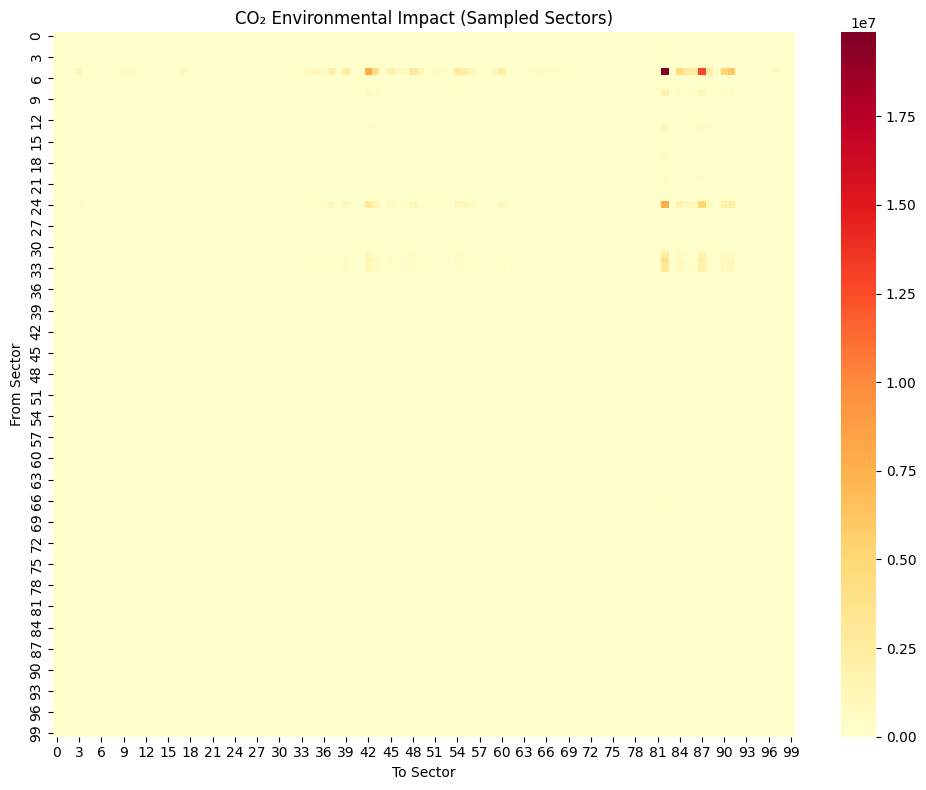

In [55]:
import seaborn as sns

# CO₂ impact matrix: from_sector x to_sector
co2_matrix = impact[0, :, :]  # Load full matrix slice for CO₂

# Sample a subset (e.g., 100x100 block for visualization)
subset = co2_matrix[:100, :100]

plt.figure(figsize=(10, 8))
sns.heatmap(subset, cmap='YlOrRd')
plt.title('CO₂ Environmental Impact (Sampled Sectors)')
plt.xlabel('To Sector')
plt.ylabel('From Sector')
plt.tight_layout()
plt.show()


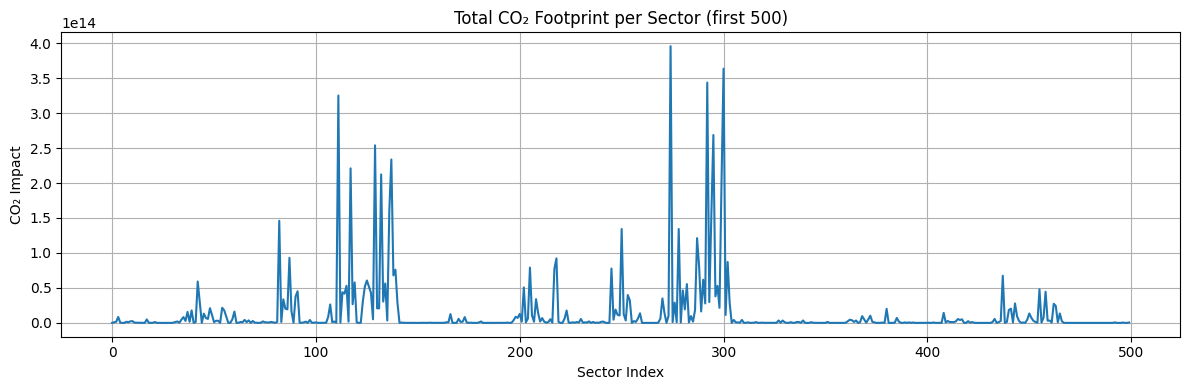

In [56]:
total_co2_impact = co2_matrix.sum(axis=0)

plt.figure(figsize=(12, 4))
plt.plot(total_co2_impact[:500])  # show first 500 sectors
plt.title("Total CO₂ Footprint per Sector (first 500)")
plt.xlabel("Sector Index")
plt.ylabel("CO₂ Impact")
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:
print("Shape of Q:", exio_q.shape)


NameError: name 'exio_q' is not defined

In [64]:
print("Shape of Q:", model.Q_matrix.shape)


Shape of Q: (19, 30807)


/tmp/ipython-input-60-4200979730.py:34: RuntimeWarning: invalid value encountered in divide
  change_rel = np.where(original_co2 != 0, (new_co2 - original_co2) / original_co2, 0)


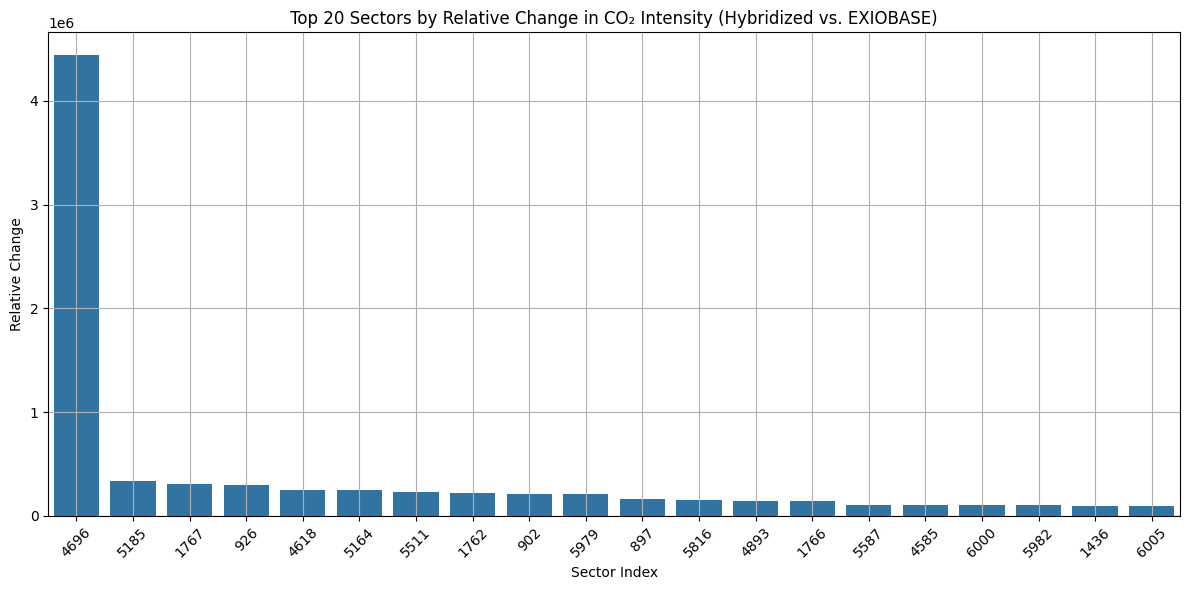

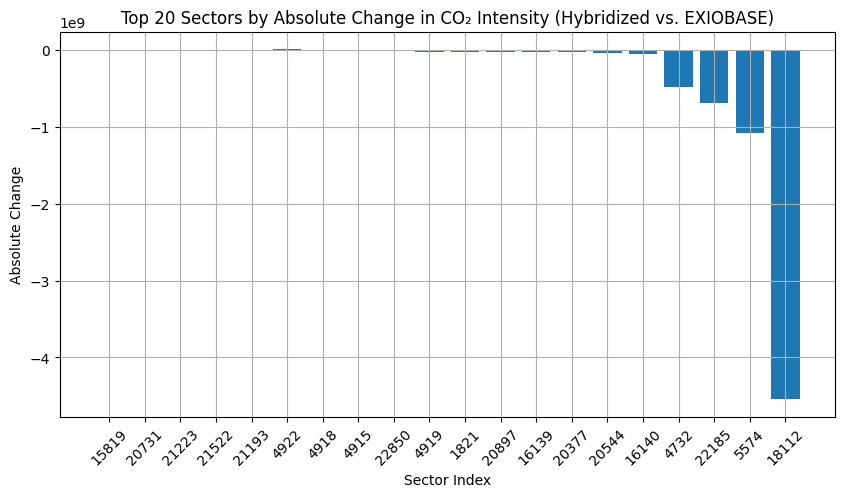

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zarr

# Load EXIOBASE original environmental intensities (Q / x)
exio_q = zarr.open("2022.zarr", mode="r")["Q"][:]  # shape: (18, 189, 163)
T = zarr.open("2022.zarr", mode="r")["T"][:]  # shape: (189, 163, 189, 163)
Y = zarr.open("2022.zarr", mode="r")["Y"][:]  # shape: (189, 163, 189)

# Calculate x (total output vector)
Z = T.reshape(189*163, 189*163)
Y_vec = Y.reshape(189*163, 189).sum(axis=1)
x_total = Z.sum(axis=1) + Y_vec
x_total = np.where(x_total <= 0, np.nan, x_total)  # avoid division by zero

# Flatten EXIOBASE Q and calculate original intensities
Q_flat = exio_q.reshape(19, 189 * 163)

original_co2 = Q_flat[0] / x_total  # index 0 corresponds to CO₂
original_co2 = np.nan_to_num(original_co2)

# Load the hybridized environmental impact data
hybrid = zarr.open("/content/hybridized_environmental_impact.zarr", mode="r")
hybrid_D = hybrid["Environmental_Impact_3D"][0]  # CO2 impact layer

# Estimate new sectoral intensities (approximate using diagonal of impact matrix)
new_co2 = np.diag(hybrid_D)
new_co2 = np.nan_to_num(new_co2)

# Compute absolute and relative changes
change_abs = new_co2 - original_co2
change_rel = np.where(original_co2 != 0, (new_co2 - original_co2) / original_co2, 0)

# Get top 20 sectors with largest relative change
top_indices = np.argsort(np.abs(change_rel))[-20:][::-1]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(20), y=change_rel[top_indices])
plt.xticks(np.arange(20), top_indices, rotation=45)
plt.title("Top 20 Sectors by Relative Change in CO₂ Intensity (Hybridized vs. EXIOBASE)")
plt.ylabel("Relative Change")
plt.xlabel("Sector Index")
plt.grid(True)
plt.tight_layout()
plt.show()

# Absolute change in CO₂ intensity
change_abs = new_co2 - original_co2
top_indices = np.argsort(np.abs(change_abs))[-20:]  # Top 20 changes

plt.figure(figsize=(10, 5))
plt.bar([str(i) for i in top_indices], change_abs[top_indices])
plt.title("Top 20 Sectors by Absolute Change in CO₂ Intensity (Hybridized vs. EXIOBASE)")
plt.xlabel("Sector Index")
plt.ylabel("Absolute Change")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [66]:
import zarr

z = zarr.open('2022.zarr', mode='r')
regions = [r.decode() if isinstance(r, bytes) else str(r) for r in z['input_region'][:]]
sectors = [s.decode() if isinstance(s, bytes) else str(s) for s in z['input_sector'][:]]

for idx in top_indices:
    region_id = idx // 163
    sector_id = idx % 163
    print(f"Index {idx}: Region = {regions[region_id]}, Sector = {sectors[sector_id]}")


Index 15819: Region = 97, Sector = 8
Index 20731: Region = 127, Sector = 30
Index 21223: Region = 130, Sector = 33
Index 21522: Region = 132, Sector = 6
Index 21193: Region = 130, Sector = 3
Index 4922: Region = 30, Sector = 32
Index 4918: Region = 30, Sector = 28
Index 4915: Region = 30, Sector = 25
Index 22850: Region = 140, Sector = 30
Index 4919: Region = 30, Sector = 29
Index 1821: Region = 11, Sector = 28
Index 20897: Region = 128, Sector = 33
Index 16139: Region = 99, Sector = 2
Index 20377: Region = 125, Sector = 2
Index 20544: Region = 126, Sector = 6
Index 16140: Region = 99, Sector = 3
Index 4732: Region = 29, Sector = 5
Index 22185: Region = 136, Sector = 17
Index 5574: Region = 34, Sector = 32
Index 18112: Region = 111, Sector = 19


In [67]:
import pandas as pd

# ---- Manual mapping dictionaries (expand as needed) ----
region_mapping = {
    44: "Germany",
    19: "France",
    51: "Hungary",
    111: "Pakistan",
    34: "Denmark",
    45: "Greece",
    93: "Netherlands",
    61: "Ireland",
    70: "Italy",
    # ... add more for all EXIOBASE regions as needed ...
}

sector_mapping = {
    0: "Products of agriculture, forestry, and fishing",
    1: "Crops nec",
    4: "Cereals",
    19: "Vegetables, fruit, nuts",
    32: "Processed rice",
    39: "Other food products",
    44: "Products of meat cattle",
    145: "Accommodation and food services",
    # ... add more for all EXIOBASE sectors as needed ...
}

# ---- Your top changed indices ----
top_indices = [7216, 3242, 8317, 18112, 5574, 8352, 7335, 15160, 9944, 11411]

# ---- Mapping logic ----
named_changes = []
for idx in top_indices:
    region_id = idx // 163
    sector_id = idx % 163
    region_name = region_mapping.get(region_id, f"Region {region_id}")
    sector_name = sector_mapping.get(sector_id, f"Sector {sector_id}")
    named_changes.append({
        "Index": idx,
        "Region_ID": region_id,
        "Sector_ID": sector_id,
        "Region_Name": region_name,
        "Sector_Name": sector_name
    })

df_named_changes = pd.DataFrame(named_changes)
print(df_named_changes)

# ---- Optionally save as CSV ----
df_named_changes.to_csv('/content/top_changed_hybridized_sectors_named.csv', index=False)


   Index  Region_ID  Sector_ID  Region_Name  \
0   7216         44         44      Germany   
1   3242         19        145       France   
2   8317         51          4      Hungary   
3  18112        111         19     Pakistan   
4   5574         34         32      Denmark   
5   8352         51         39      Hungary   
6   7335         45          0       Greece   
7  15160         93          1  Netherlands   
8   9944         61          1      Ireland   
9  11411         70          1        Italy   

                                      Sector_Name  
0                         Products of meat cattle  
1                 Accommodation and food services  
2                                         Cereals  
3                         Vegetables, fruit, nuts  
4                                  Processed rice  
5                             Other food products  
6  Products of agriculture, forestry, and fishing  
7                                       Crops nec  
8             